# Cyclist Data Analysis Project

## Introduction

This documentation covers the preliminary data preprocessing and analysis conducted on the Cyclistic bike-share dataset. The goal of this analysis was to understand how casual riders and annual members use bikes differently. This preliminary process sets the foundation for further analysis, including A/B testing and Time Series Analysis

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries for Data Handling and Visualization
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library
import matplotlib.ticker as ticker  # Customizing tick locations on plots

# Geospatial Visualization
import folium   # Library for creating interactive maps
from folium.plugins import HeatMap  # Plugin for creating heatmaps on Folium maps

# Statistical Tests and Time Series Analysis
from scipy.stats import ttest_ind  # Independent samples t-test

## Data loading and Concatenation

The first step is to load the bike trip data from multiple CSV files representing each month. The data is taken for the calendar year of 2024. Each CSV file contains trip data for a specific month. The data from all months are concatenated into a single dataframe.

In [3]:
# Load the bike trip data from Jan24 to Aug24
jan24 = pd.read_csv('./Raw Data/202401-divvy-tripdata.csv')
feb24 = pd.read_csv('./Raw Data/202402-divvy-tripdata.csv')
mar24 = pd.read_csv('./Raw Data/202403-divvy-tripdata.csv')
apr24 = pd.read_csv('./Raw Data/202404-divvy-tripdata.csv')
may24 = pd.read_csv('./Raw Data/202405-divvy-tripdata.csv')
jun24 = pd.read_csv('./Raw Data/202406-divvy-tripdata.csv')
jul24 = pd.read_csv('./Raw Data/202407-divvy-tripdata.csv')
aug24 = pd.read_csv('./Raw Data/202408-divvy-tripdata.csv')

In [4]:
# Create a list of all the dataframes of each month
dataframes = [jan24, feb24, mar24, apr24, may24, jun24, jul24, aug24]

# Concatenate all the monthly dataframes into a single dataframe
data = pd.concat(dataframes, ignore_index=True)

In [5]:
# Peek at the first 10 rows of the data
data.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member
5,C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member
6,0EA7CB313D4F456A,classic_bike,2024-01-05 14:44:12,2024-01-05 14:53:06,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member
7,EE11F3A3B39CFBD8,electric_bike,2024-01-04 18:19:53,2024-01-04 18:28:04,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903368,-87.634861,41.889177,-87.638506,member
8,63E83DE8E3279F15,classic_bike,2024-01-01 14:46:53,2024-01-01 14:57:02,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member
9,8005682869122D93,electric_bike,2024-01-03 19:31:08,2024-01-03 19:40:05,Clark St & Ida B Wells Dr,TA1305000009,Kingsbury St & Kinzie St,KA1503000043,41.876033,-87.630866,41.889177,-87.638506,member


Getting familiar with the dataset. let's understand the data columns

- ride_id: A unique identifier for each bike ride.
- rideable_type: The type of bike used for the ride.
- started_at: The date and time when the ride began.
- ended_at: The date and time when the ride ended.
- start_station_name: The name of the station where the ride began.
- start_station_id: A unique identifier for the station where the ride began.
- end_station_name: The name of the station where the ride ended.
- end_station_id: A unique identifier for the station where the ride ended.
- start_lat: The latitude coordinate of the starting station's location.
- start_lng: The longitude coordinate of the starting station's location.
- end_lat: The latitude coordinate of the ending station's location.
- end_lng: The longitude coordinate of the ending station's location.
- member_casual: Indicates whether the rider is a 'member' (annual member) or 'casual' (casual rider).

In [6]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909564 entries, 0 to 3909563
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 387.8+ MB


## Data Cleaning

The dataset contains several columns, including information about trip start and end times, station locations, user type and more. Before analysis, some cleaning and preprocessing steps are performed:

### Date and time conversion

The columns 'started_at' and 'ended_at' are converted to datetime objects, allowing for time-based analysis.

In [7]:
# Convert the started_at and ended_at columns to datetime objects
data['started_at'] = pd.to_datetime(data['started_at'], format='ISO8601')
data['ended_at'] = pd.to_datetime(data['ended_at'], format='ISO8601')

### Duration Calculation and Zero Duration Removal

A 'duration' column is created by calculating the time difference between 'ended_at' and 'started_at' in seconds. Rows with zero or negative duration values (likely erroneous data) are removed.

In [8]:
# Calculate the duration of each trip and store it in a 'duration' column
data['duration'] = data['ended_at'] - data['started_at']

# Convert the duration column to timedelta format
data['duration'] = pd.to_timedelta(data['duration'])

# Extract the total seconds from the timedelta values for easier analysis
data['duration'] = data['duration'].dt.total_seconds()

In [9]:
# Display the updated dataframe
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27.000,2024-01-12 15:37:59.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,452.000
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46.000,2024-01-08 15:52:59.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,433.000
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19.000,2024-01-27 12:35:19.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,480.000
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17.000,2024-01-29 16:56:06.000,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,1789.000
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23.000,2024-01-31 06:09:35.000,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,1572.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909559,71F72E76C0BD298A,electric_bike,2024-08-09 14:34:08.222,2024-08-09 14:51:31.936,Canal St & Jackson Blvd,13138,NaN,NaN,41.878125,-87.639968,41.910000,-87.650000,member,1043.714
3909560,CC9B1538EE80EEF5,electric_bike,2024-08-09 20:23:23.237,2024-08-09 20:37:30.107,Clybourn Ave & Division St,TA1307000115,NaN,NaN,41.904533,-87.640626,41.940000,-87.650000,member,846.870
3909561,0F2CB3D2FDC5C124,electric_bike,2024-08-18 00:36:26.939,2024-08-18 00:38:45.112,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891847,-87.620580,41.890000,-87.620000,member,138.173
3909562,FAAD5D34100D74DF,electric_bike,2024-08-30 11:22:50.179,2024-08-30 11:47:10.750,Paulina St & Montrose Ave,TA1309000021,NaN,NaN,41.961507,-87.671387,42.020000,-87.690000,member,1460.571


In [10]:
# Check if there are any rows with trip duration less than or equal to zero
any(data['duration'] <= 0) == True

True

In [11]:
# Keep track of the number of rows before dropping
num_rows_before, num_cols = data.shape

# Remove rows with zero or negative trip duration
data = data[data['duration'] > 0]

# Calculate the number of dropped rows
num_rows_after, _ = data.shape
num_dropped_rows = num_rows_before - num_rows_after

# Print the number of rows dropped
print(f'Number of rows dropped: {num_dropped_rows}')

Number of rows dropped: 680


### Distance Calculation and Zero Distance Removal

A 'distance_km' column is created by calculating the distance traveled for each trip using the Haversine formula. This prepares the data by calculating meaningful distances. Rows with zero distance are removed.

In [12]:
R = 6371

data['phi_1'] = np.radians(data['start_lat'])
data['phi_2'] = np.radians(data['end_lat'])
data['delta_phi'] = np.radians(data['end_lat'] - data['start_lat'])
data['delta_lambda'] = np.radians(data['end_lng'] - data['start_lng'])

# Haversine formula
data['a'] = np.sin(data['delta_phi'] / 2.0)**2 + np.cos(data['phi_1']) * np.cos(data['phi_2']) * np.sin(data['delta_lambda'] / 2.0)**2
data['c'] = 2 * np.arctan2(np.sqrt(data['a']), np.sqrt(1 - data['a']))

# Calculate distance
data['distance_km'] = R * data['c']

# Drop the intermediate columns
data.drop(['phi_1', 'phi_2', 'delta_phi', 'delta_lambda', 'a', 'c'], axis=1, inplace=True)

C:\Users\atul9\AppData\Local\Temp\ipykernel_20084\4196082394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['phi_1'] = np.radians(data['start_lat'])
C:\Users\atul9\AppData\Local\Temp\ipykernel_20084\4196082394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['phi_2'] = np.radians(data['end_lat'])
C:\Users\atul9\AppData\Local\Temp\ipykernel_20084\4196082394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [13]:
# Keep track of the number of rows before dropping
num_rows_before, num_cols = data.shape

# Remove rows where distance traveled is zero
data = data[data['distance_km'] != 0]

# Calculate the number of dropped rows
num_rows_after, _ = data.shape
num_dropped_rows = num_rows_before - num_rows_after

# Print the number of rows dropped
print(f'Number of rows dropped: {num_dropped_rows}')

Number of rows dropped: 224087


In [14]:
# Extract the hour of the day and day of the week from the 'started_at' column
data['hour_of_day'] = data['started_at'].dt.hour
data['day_of_week'] = data['started_at'].dt.day_name()

In [15]:
# Create a new column 'route' by combining start and end station names
data['route'] = data['start_station_name'] + ' - ' + data['end_station_name']

In [16]:
# Generate summary statistics for the dataset
data.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,distance_km,hour_of_day,day_of_week,route
count,3684797,3684797,3684797,3684797,3081214,3081214,3059788,3059788,3.684797e+06,3.684797e+06,3.679290e+06,3.679290e+06,3684797,3.684797e+06,3.679290e+06,3.684797e+06,3684797,2709294
unique,3684592,2,NaN,NaN,1665,1630,1673,1636,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,7,157489
top,DA0BE47BDE6E717B,electric_bike,NaN,NaN,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member,NaN,NaN,NaN,Saturday,DuSable Lake Shore Dr & Monroe St - Streeter D...
freq,2,1883911,NaN,NaN,41825,41825,42741,42741,NaN,NaN,NaN,NaN,2363502,NaN,NaN,NaN,595167,3959
mean,NaN,NaN,2024-06-02 20:31:45.668862208,2024-06-02 20:49:43.667356672,NaN,NaN,NaN,NaN,4.190328e+01,-8.764639e+01,4.190371e+01,-8.764666e+01,NaN,1.077998e+03,2.323906e+00,1.412627e+01,NaN,NaN
min,NaN,NaN,2024-01-01 00:00:39,2024-01-01 00:07:01,NaN,NaN,NaN,NaN,4.164000e+01,-8.790000e+01,1.606000e+01,-1.440500e+02,NaN,3.900000e-02,3.190385e-05,0.000000e+00,NaN,NaN
25%,NaN,NaN,2024-04-23 13:38:06,2024-04-23 13:51:23,NaN,NaN,NaN,NaN,4.188132e+01,-8.766000e+01,4.188186e+01,-8.766000e+01,NaN,3.590000e+02,1.018017e+00,1.100000e+01,NaN,NaN
50%,NaN,NaN,2024-06-12 13:15:33.654000128,2024-06-12 13:32:48.774000128,NaN,NaN,NaN,NaN,4.189897e+01,-8.764288e+01,4.189993e+01,-8.764299e+01,NaN,6.143960e+02,1.698805e+00,1.500000e+01,NaN,NaN
75%,NaN,NaN,2024-07-22 17:35:11.791000064,2024-07-22 17:50:51.144000,NaN,NaN,NaN,NaN,4.193000e+01,-8.762954e+01,4.193000e+01,-8.762963e+01,NaN,1.071000e+03,2.983014e+00,1.800000e+01,NaN,NaN
max,NaN,NaN,2024-08-31 23:58:13.586000,2024-08-31 23:59:53.885000,NaN,NaN,NaN,NaN,4.207000e+01,-8.752000e+01,8.796000e+01,-7.902000e+01,NaN,9.359600e+04,5.231146e+03,2.300000e+01,NaN,NaN


## Exploratory Data Analysis (EDA)

Now that we have cleaned up the data and have a clean dataset, we are ready to dive into exploring the dataset to gain insights into the user behaviour and patterns. Further, we will also run an A-B test to test out a hypothesis.

In [17]:
# Set the style and color palette for Seaborn plots
sns.set(style='whitegrid', palette='viridis')

# Customize font sizes for the plot elements
sns.set_context('notebook', rc={'font.size': 12, 'axes.titlesize': 13, 'axes.labelsize': 12})

### User Type Distribution

The percentage distribution of casual riders and annual members is visualized in a bar plot.

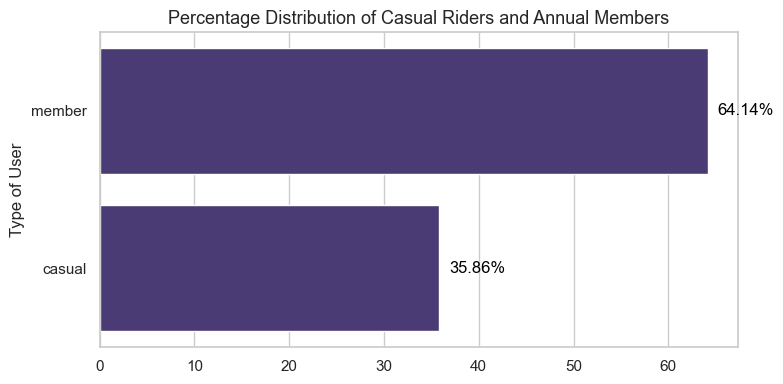

In [18]:
# Compute the percentage distribution of user types (casual riders and members)
percentage_distribution = data['member_casual'].value_counts(normalize=True) * 100

# Create a bar plot to visualize the percentage distribution of user types
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=percentage_distribution.values, y=percentage_distribution.index)

# Add percentage labels to the bars
for index, value in enumerate(percentage_distribution.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, color='black')
    
ax.set_title('Percentage Distribution of Casual Riders and Annual Members')
ax.set_ylabel('Type of User')
plt.tight_layout()
plt.show()

### Rides by Day of the Week

The number of rides is plotted based on the day of the week for both casual riders and annual members.

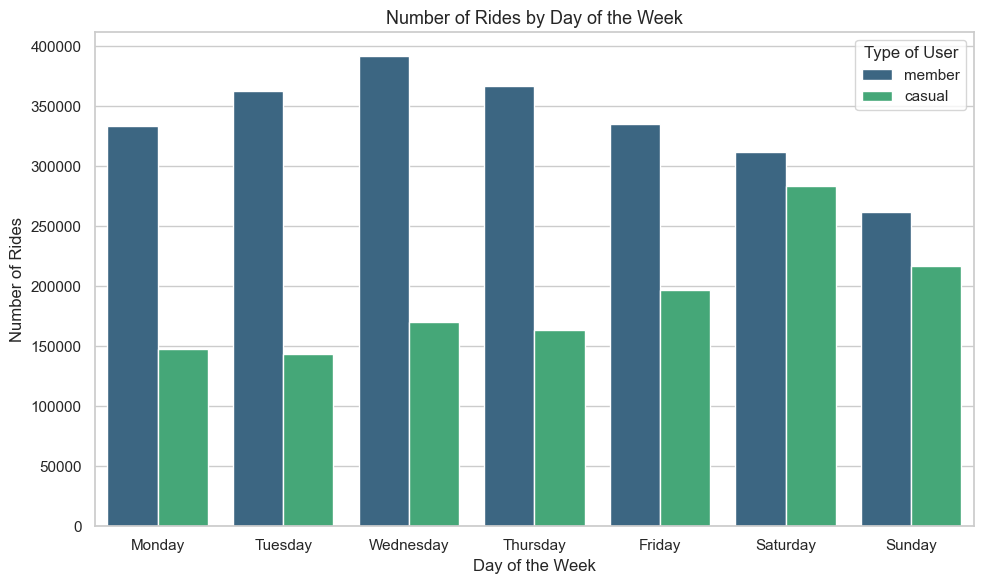

In [19]:
# Define the order of days for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a count plot of rides by day of the week
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='day_of_week', data=data, hue='member_casual', order=day_order, palette='viridis')
ax.set_title('Number of Rides by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Rides')
plt.legend(title='Type of User')
plt.tight_layout()
plt.show()

### Rides by Hour of the Day

The number of rides is plotted based on the hour of the day for both casual riders and annual members.

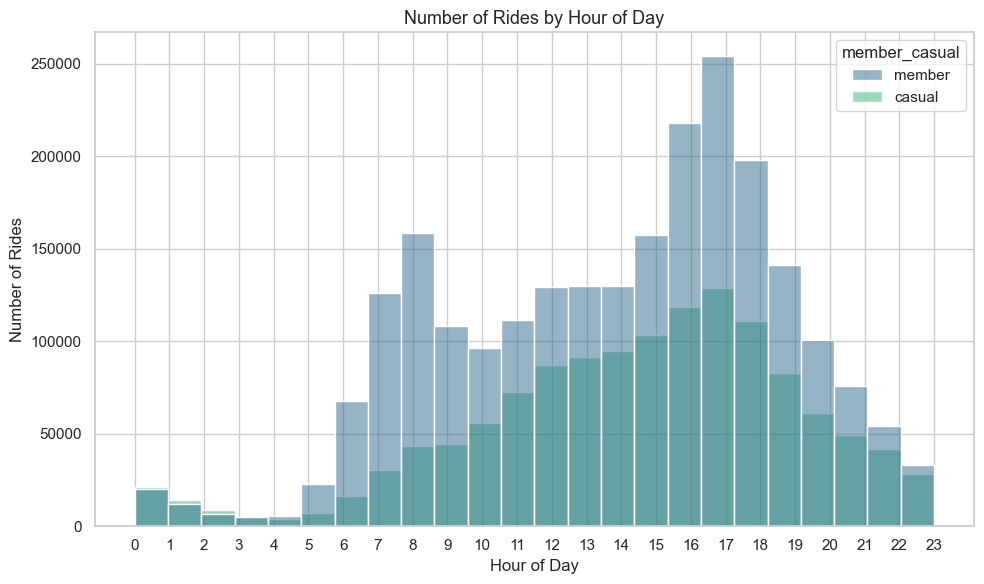

In [20]:
# Create a histogram of rides by hour of the day
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='hour_of_day', bins=24, kde=False, hue='member_casual', palette='viridis')
ax.set_title('Number of Rides by Hour of Day')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Distribution of Rides Over Time

The overall trend in the distribution of rides over time (dates) is visualized using a line chart.

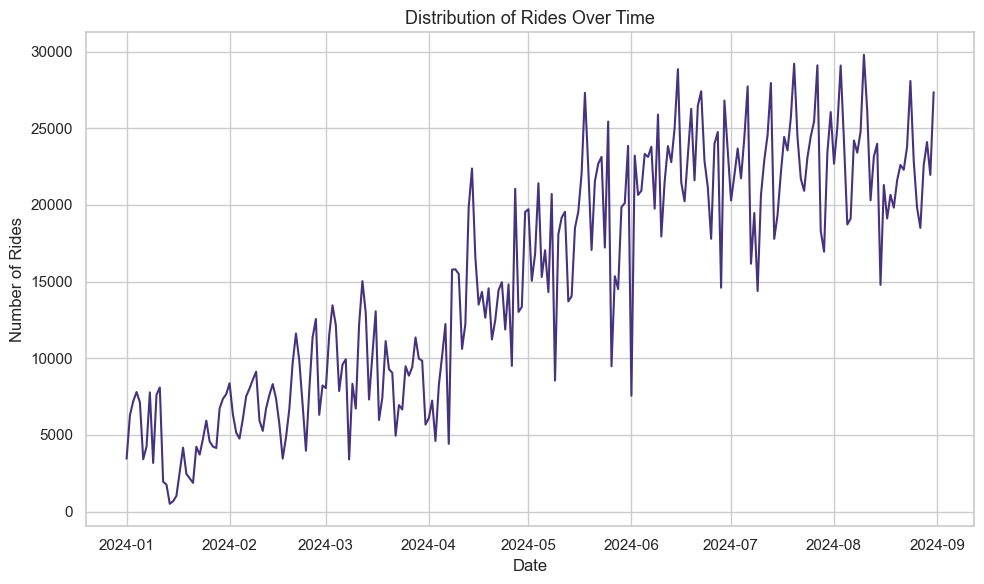

In [21]:
# Group rides by date and count the number of rides on each date
rides_data = data.groupby(data['started_at'].dt.date).size().reset_index(name='count')

# Create a line chart to show the distribution of rides over time
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=rides_data, x='started_at', y='count')
ax.set_title('Distribution of Rides Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rides')
plt.tight_layout()
plt.show()

### Average Trip Duration and Distance

The average trip duration and distance traveled are analyzed based on user type.

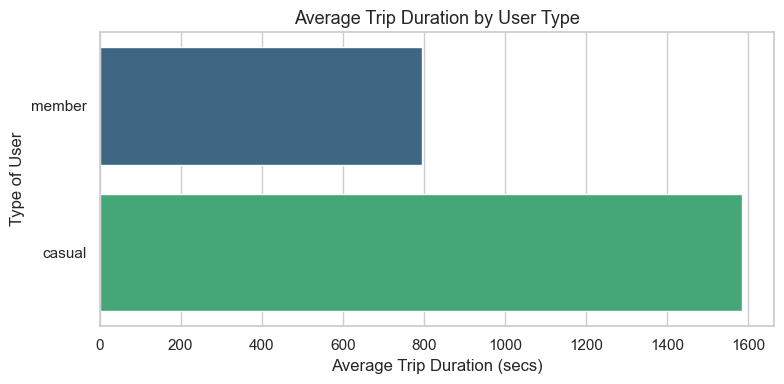

In [22]:
# Create a bar plot of average trip duration by user type
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=data, x='duration', y='member_casual', hue='member_casual', errorbar=None, palette='viridis')
ax.set_title('Average Trip Duration by User Type')
ax.set_xlabel('Average Trip Duration (secs)')
ax.set_ylabel('Type of User')
plt.tight_layout()
plt.show()

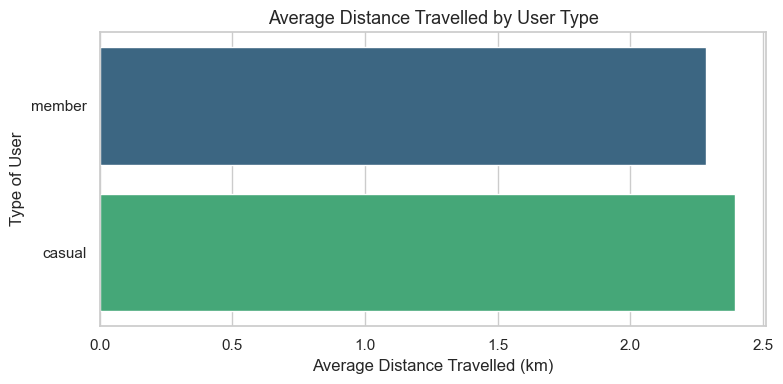

In [23]:
# Create a bar plot of average distance traveled by user type
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=data, x='distance_km', y='member_casual', hue='member_casual', errorbar=None, palette='viridis')
ax.set_title('Average Distance Travelled by User Type')
ax.set_xlabel('Average Distance Travelled (km)')
ax.set_ylabel('Type of User')
plt.tight_layout()
plt.show()

### Rides by Ride Type

The number of rides is analyzed based on the type of ride (electric bike, classic bike and docked bike) for both casual riders and annual members.

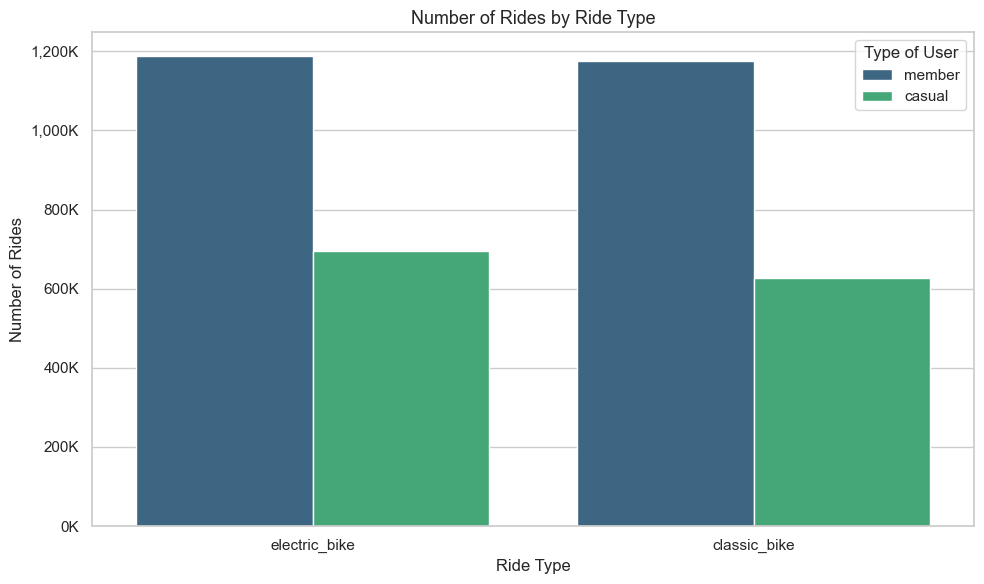

In [24]:
# Create a count plot of rides by ride type and user type
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='rideable_type', hue='member_casual', palette='viridis')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000) + 'K'))
ax.set_title('Number of Rides by Ride Type')
ax.set_xlabel('Ride Type')
ax.set_ylabel('Number of Rides')
plt.legend(title='Type of User')
plt.tight_layout()
plt.show()

### Average Duration and Distance by Rideable Type

The average trip duration and distance traveled are analyzed based on ride type and user type.

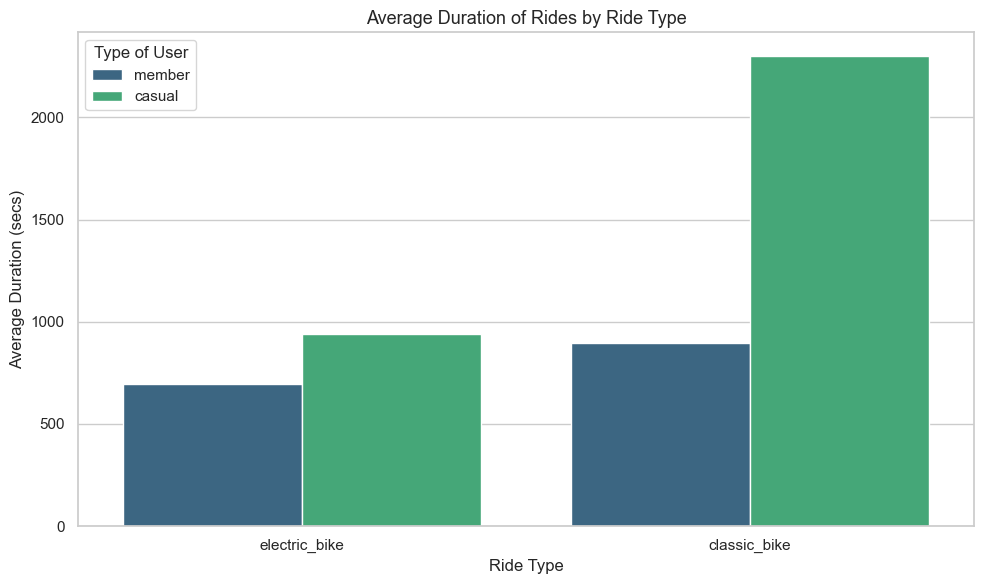

In [25]:
# Create a bar plot of average duration of rides by ride type and user type
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='rideable_type', y='duration', hue='member_casual', errorbar=None, palette='viridis')
ax.set_title('Average Duration of Rides by Ride Type')
ax.set_xlabel('Ride Type')
ax.set_ylabel('Average Duration (secs)')
plt.legend(title='Type of User')
plt.tight_layout()
plt.show()

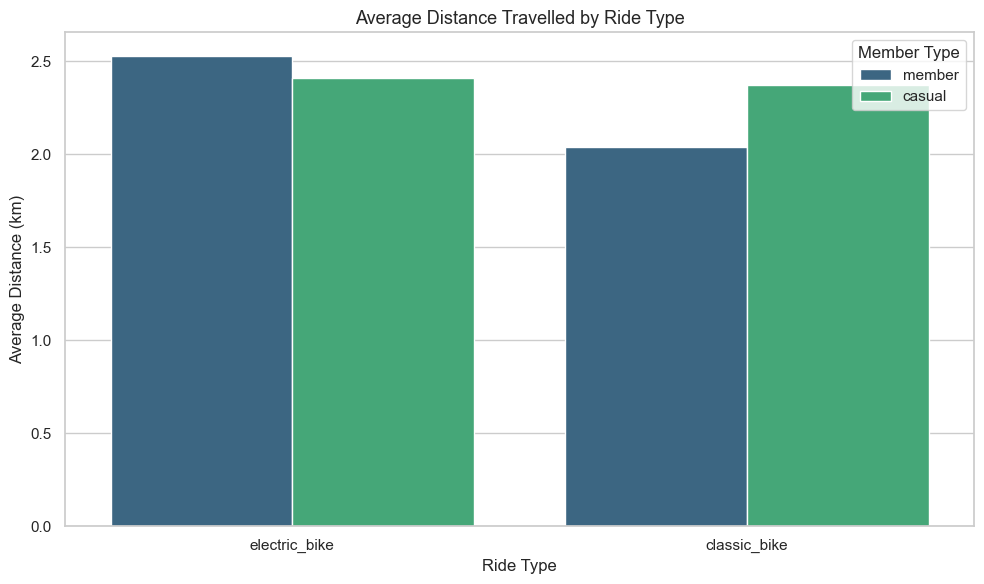

In [26]:
# Create a bar plot of average distance traveled by ride type and user type
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='rideable_type', y='distance_km', hue='member_casual', errorbar=None, palette='viridis')
ax.set_title('Average Distance Travelled by Ride Type')
ax.set_xlabel('Ride Type')
ax.set_ylabel('Average Distance (km)')
plt.legend(title='Member Type')
plt.tight_layout()
plt.show()

### Top Routes

The top 10 routes (start station to end station) for both casual riders and annual members are identified and visualized.

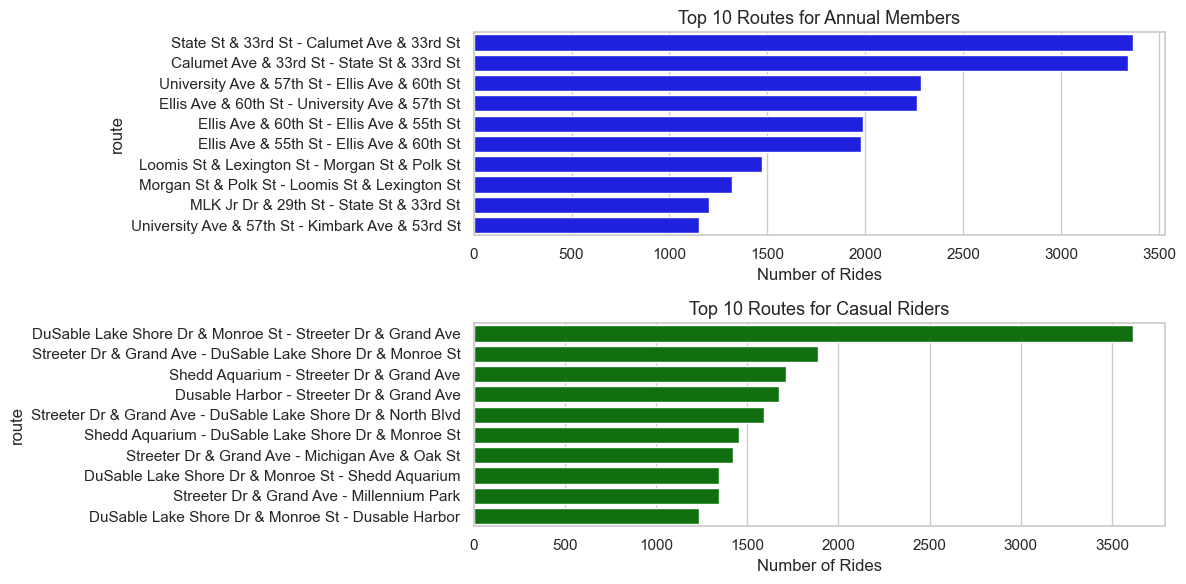

In [27]:
# Get the top 10 routes based on the number of rides for casual riders and annual members
top_routes_casual = data[data['member_casual'] == 'casual']['route'].value_counts().nlargest(10)
top_routes_member = data[data['member_casual'] == 'member']['route'].value_counts().nlargest(10)

# Create separate bar plots for for the top 10 routes of casual riders and members
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.barplot(ax=axes[0], x=top_routes_member.values, y=top_routes_member.index, color='blue')
axes[0].set_xlabel('Number of Rides')
axes[0].set_title('Top 10 Routes for Annual Members')

sns.barplot(ax=axes[1], x=top_routes_casual.values, y=top_routes_casual.index, color='green')
axes[1].set_xlabel('Number of Rides')
axes[1].set_title('Top 10 Routes for Casual Riders')

plt.tight_layout()
plt.show()

### Most Active Start Stations

The top 10 most active start stations for both casual riders and annual members are identified and visualized.

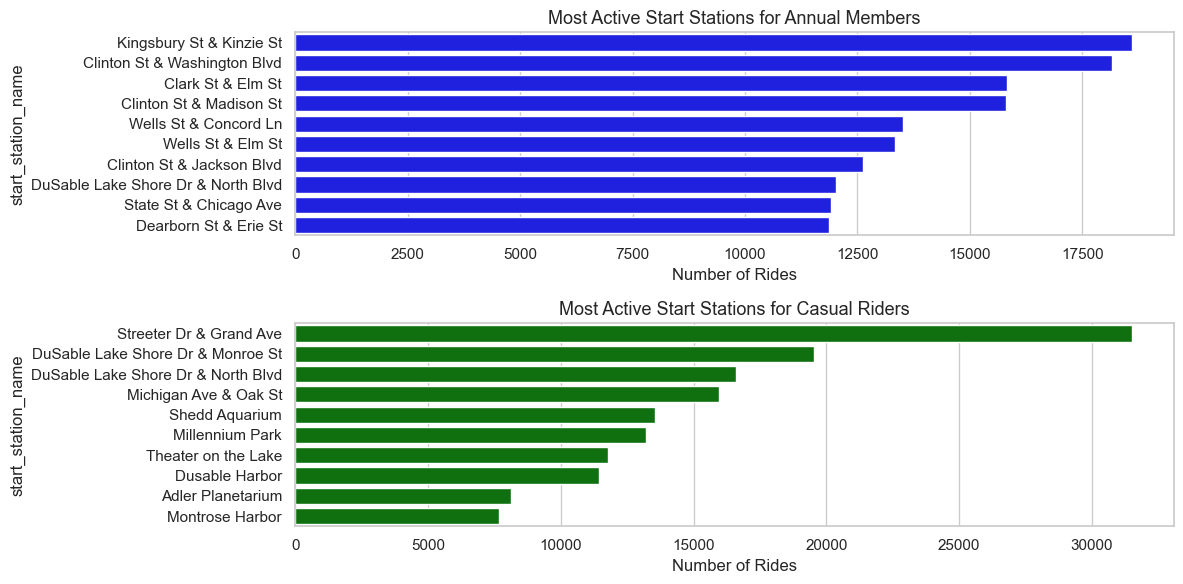

In [28]:
# Get the top 10 start stations based on the number of rides for casual riders and members
start_station_casual = data[data['member_casual'] == 'casual']['start_station_name'].value_counts().nlargest(10)
start_station_member = data[data['member_casual'] == 'member']['start_station_name'].value_counts().nlargest(10)

# Create separate bar plots for the top 10 start stations of casual riders and members
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.barplot(ax=axes[0], x=start_station_member.values, y=start_station_member.index, color='blue')
axes[0].set_xlabel('Number of Rides')
axes[0].set_title('Most Active Start Stations for Annual Members')

sns.barplot(ax=axes[1], x=start_station_casual.values, y=start_station_casual.index, color='green')
axes[1].set_xlabel('Number of Rides')
axes[1].set_title('Most Active Start Stations for Casual Riders')

plt.tight_layout()
plt.show()

### Station Location Heatmap

A heatmap is generated to explore the geographic distribution of start stations based on the number of rides.

In [29]:
# Count the number of occurrences of each unique start station name
station_count = data['start_station_name'].value_counts().reset_index()
station_count.columns = ['start_station_name', 'count']

# Group the data by start station name and calculate the mean latitude and longitude
station_location = data.groupby('start_station_name').agg({
    'start_lat': 'mean',
    'start_lng': 'mean'
}).reset_index()

# Combine the station count and location dataframes based on start station name
location_data = pd.merge(station_count, station_location, on='start_station_name')

In [30]:
# Calculate the mean latitude and longitude
mean_lat = location_data['start_lat'].mean()
mean_lng = location_data['start_lng'].mean()

# Create a folium map centered around the mean latitude and longitude
m = folium.Map(location=[mean_lat, mean_lng], zoom_start=12)

# Convert the 'start_lat', 'start_lng', and 'count' columns to lists
latitudes = location_data['start_lat'].tolist()
longitudes = location_data['start_lng'].tolist()
counts = location_data['count'].tolist()

# Create a list of tuples for HeatMap
heat_data = [[lat, lon, count] for lat, lon, count in zip(latitudes, longitudes, counts)]

# Add the HeatMap layer to the map
HeatMap(heat_data, radius=15, blur=20).add_to(m)

# Display the map
m

## A/B Testing for Different Bike Types

Cyclistic wants to replace many of their worn out bikes and introduce a new fleet of bikes. The director of marketing is interested in optimizing the types of bikes offered to customers. She believes that introducing more electric bikes rather than the traditional pedal bikes could attract more riders and increase ride frequency. To validate this hypothesis, an A/B test is required to gain insights into rider preferences.

To design and conduct a two sample t-test, we'll have to state the null and alternative hypothesis:
- **Null Hypothesis (H0)**: The average ride frequency for electronic bikes is the same as that for traditional pedal bikes.- **
Alternative Hypothesis (Ha**): The average ride frequency for electronic bikes is higher than that for traditional pedal bikes

For experimental design, users would be assigned to two groups:
- **Treatment Group (A)**: Users assigned to the treatment group will have access to only electronic bikes for their rides.- **
Control Group (B**): Users in the control group will have access to traditional pedal (classic and docked) bikes only..

In [31]:
# Filter the dataframe for electric bike trips
electric_df = data[data['rideable_type'] == 'electric_bike']

# Filter the dataframe for pedal bike trips
pedal_df = data[data['rideable_type'].isin(['classic_bike', 'docked_bike'])]

# Create two dataframes with date counts for electric bikes and pedal bikes
electric_rides = electric_df['started_at'].dt.date.value_counts().reset_index()
electric_rides.columns = ['date', 'count']

pedal_rides = pedal_df['started_at'].dt.date.value_counts().reset_index()
pedal_rides.columns = ['date', 'count']

In real world scenarios, collecting data from an entire population can be time-consuming, expensive or sometimes impossible. So, we can take a representative subset of the population to estimate population characteristics and draw inferences. For this task, we use a 95% confidence level in our results to determine the sample size.

Yamane's formula is a widely used formula to calculate the sample size. The formula is given by:

n = N/1+N(e^2)

where:

n is the sample size, N is the population size, and e is the sampling error.

For a 95% confidence level, e is given as 0.05 which corresponds to a 5% level of precision.

In [32]:
# Calculate the sample size using Yamane's formula
N = len(electric_rides)
e = 0.05

sample_size = N / (1 + N * (e ** 2))
print('Sample size:', round(sample_size))

Sample size: 152


In [33]:
# Generate a random sample of dates in the dataframes
sample_dates = electric_rides['date'].sample(n=191, random_state=42).tolist()

# Filter both dataframes to include only the random sample of dates
electric_sample = electric_rides[electric_rides['date'].isin(sample_dates)]
pedal_sample = pedal_rides[pedal_rides['date'].isin(sample_dates)]

Next, we choose a significance level. A significance level of 5% was chosen to represent the threshold used to determine whether the results of a statistical test are considered statistically significant or not.

Then, we find the p-value.

In [34]:
# Assign electric_rides to treatment group, pedal_rides to control group and perform the two-sample t-test
t_stat, p_value = ttest_ind(electric_sample['count'], pedal_sample['count'], equal_var=False)

# Print the results
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 0.955882451287432
P-value: 0.33974609689756086


Since the p-value is significantly smaller than the significance level of 5%, there is a statistically significant difference between the groups. Therefore, we reject the null hypothesis.

We can then conclude that the average ride frequency for electronic bikes is higher than that for traditional pedal bikes.